In [9]:
###Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import researchpy as rp

In [10]:
###Load Data

df = pd.read_csv('../data/labeled/movement_merged.csv', index_col=0)
df.columns

Index(['ts_r', 'acc_x_r', 'acc_y_r', 'acc_z_r', 'temp_r', 'gyr_x_r', 'gyr_y_r',
       'gyr_z_r', 'mag_x_r', 'mag_y_r', 'mag_z_r', 'kal_status_r', 'alpha_r',
       'beta_r', 'ts_n', 'acc_x_n', 'acc_y_n', 'acc_z_n', 'temp_n', 'gyr_x_n',
       'gyr_y_n', 'gyr_z_n', 'mag_x_n', 'mag_y_n', 'mag_z_n', 'kal_status_n',
       'alpha_n', 'beta_n', 'started', 'calibrated', 'monitoring', 'zone',
       'in_bending_orange_zone', 'in_bending_red_zone', 'in_overreach_zone',
       'bending_buzzing', 'overreach_buzzing', 'walking', 'vibrating',
       'static_posture', 'label', 'label2'],
      dtype='object')

In [3]:
counter = 1
seconds = 1
sec_list = []

for x in range(len(df)):
    if counter <= 25:
        sec_list.append(seconds)
        counter = counter + 1
    else:
        seconds = seconds + 1
        sec_list.append(seconds)
        counter = 2

df['seconds'] = sec_list

In [4]:
diff_list = []
index = 0

for a in df['alpha_r']:
    diff = a - df.loc[index, 'beta_r']
    diff_list.append(diff)
    index = index + 1

df['ab_r_diff'] = diff_list

In [11]:
df_analysis = df.drop(['ts_r', 'temp_r', 'kal_status_r', 'ts_n', 'temp_n', 'kal_status_n', 'alpha_n', 'beta_n'], axis=1)

df_analysis.columns

Index(['acc_x_r', 'acc_y_r', 'acc_z_r', 'gyr_x_r', 'gyr_y_r', 'gyr_z_r',
       'mag_x_r', 'mag_y_r', 'mag_z_r', 'alpha_r', 'beta_r', 'acc_x_n',
       'acc_y_n', 'acc_z_n', 'gyr_x_n', 'gyr_y_n', 'gyr_z_n', 'mag_x_n',
       'mag_y_n', 'mag_z_n', 'started', 'calibrated', 'monitoring', 'zone',
       'in_bending_orange_zone', 'in_bending_red_zone', 'in_overreach_zone',
       'bending_buzzing', 'overreach_buzzing', 'walking', 'vibrating',
       'static_posture', 'label', 'label2'],
      dtype='object')

In [12]:
df_analysis['label'].unique()

array(['kalibratie', 'staan', 'wandelen', 'buiging', 'armen_hoog',
       'draaien'], dtype=object)

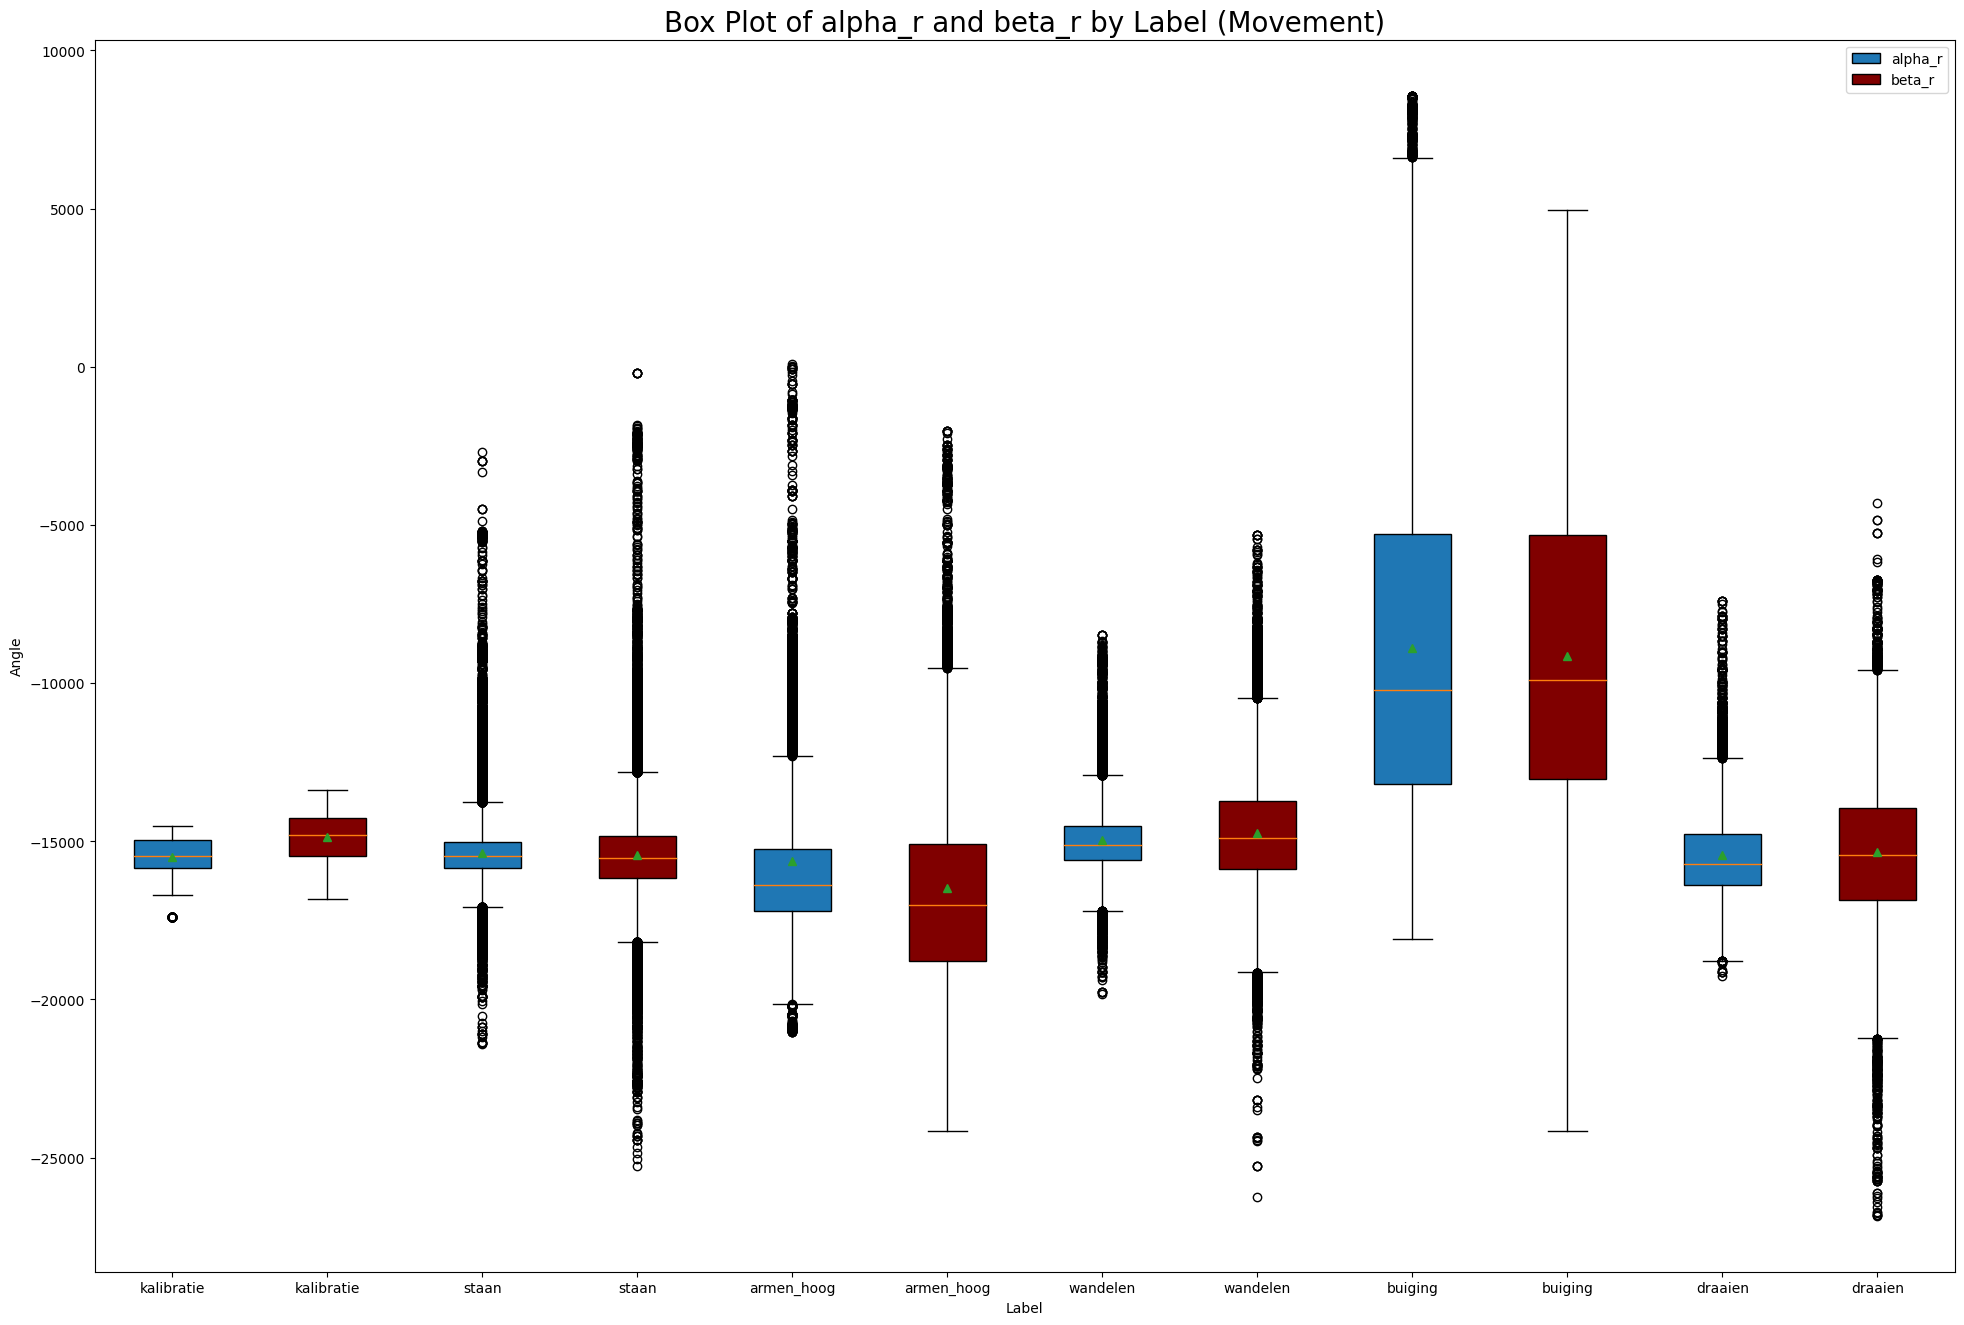

In [15]:
fig = plt.figure(figsize= (24, 16))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of alpha_r and beta_r by Label (Movement)", fontsize= 20)
ax.set

data =  [df_analysis['alpha_r'][df_analysis['label'] == 'kalibratie'],
        df_analysis['beta_r'][df_analysis['label'] == 'kalibratie'],
        df_analysis['alpha_r'][df_analysis['label'] == 'staan'],
        df_analysis['beta_r'][df_analysis['label'] == 'staan'],
        df_analysis['alpha_r'][df_analysis['label'] == 'armen_hoog'],
        df_analysis['beta_r'][df_analysis['label'] == 'armen_hoog'],
        df_analysis['alpha_r'][df_analysis['label'] == 'wandelen'],
        df_analysis['beta_r'][df_analysis['label'] == 'wandelen'],
        df_analysis['alpha_r'][df_analysis['label'] == 'buiging'],
        df_analysis['beta_r'][df_analysis['label'] == 'buiging'],
        df_analysis['alpha_r'][df_analysis['label'] == 'draaien'],
        df_analysis['beta_r'][df_analysis['label'] == 'draaien']]

bp = ax.boxplot(data,
           labels= ['kalibratie', 'kalibratie', 'staan', 'staan', 'armen_hoog', 'armen_hoog', 'wandelen', 'wandelen', 'buiging', 'buiging', 
           'draaien', 'draaien'],
           showmeans= True, patch_artist=True)

bp['boxes'][1].set_facecolor('#800000')
bp['boxes'][3].set_facecolor('#800000')
bp['boxes'][5].set_facecolor('#800000')
bp['boxes'][7].set_facecolor('#800000')
bp['boxes'][9].set_facecolor('#800000')
bp['boxes'][11].set_facecolor('#800000')

plt.xlabel("Label")
plt.ylabel("Angle")
plt.legend([bp['boxes'][0], bp['boxes'][1]], ['alpha_r', 'beta_r'])

plt.show()

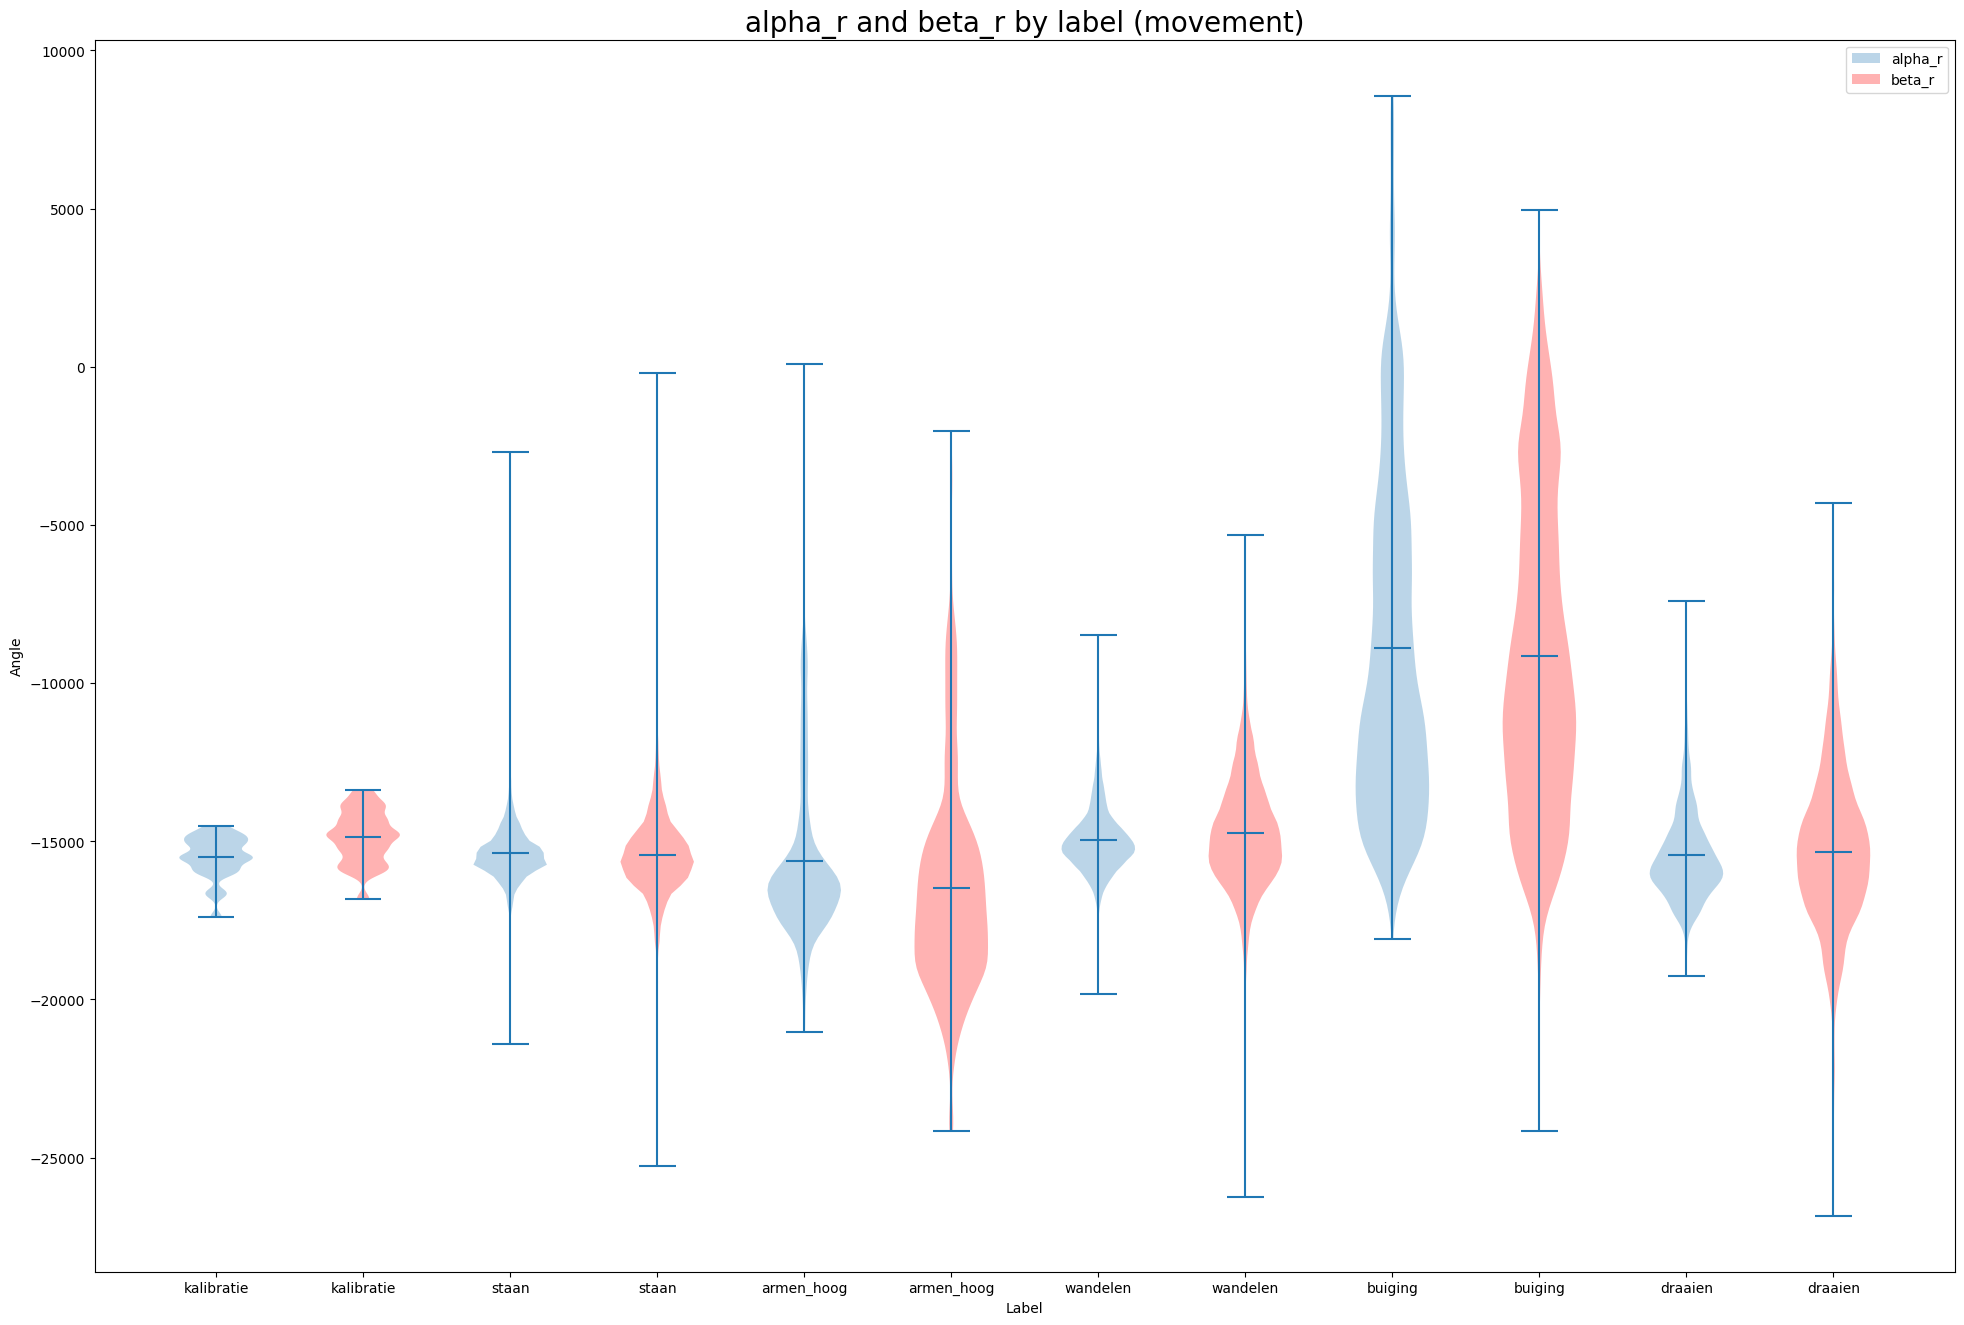

In [16]:
data_to_violin = [df_analysis['alpha_r'][df_analysis['label'] == 'kalibratie'],
                df_analysis['beta_r'][df_analysis['label'] == 'kalibratie'],
                df_analysis['alpha_r'][df_analysis['label'] == 'staan'],
                df_analysis['beta_r'][df_analysis['label'] == 'staan'],
                df_analysis['alpha_r'][df_analysis['label'] == 'armen_hoog'],
                df_analysis['beta_r'][df_analysis['label'] == 'armen_hoog'],
                df_analysis['alpha_r'][df_analysis['label'] == 'wandelen'],
                df_analysis['beta_r'][df_analysis['label'] == 'wandelen'],
                df_analysis['alpha_r'][df_analysis['label'] == 'buiging'],
                df_analysis['beta_r'][df_analysis['label'] == 'buiging'],
                df_analysis['alpha_r'][df_analysis['label'] == 'draaien'],
                df_analysis['beta_r'][df_analysis['label'] == 'draaien']]

fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(111)

x_pos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
x_labels = ['kalibratie', 'kalibratie', 'staan', 'staan', 'armen_hoog', 'armen_hoog', 'wandelen', 'wandelen', 'buiging', 'buiging', 
            'draaien', 'draaien']

vp = ax.violinplot(data_to_violin, showmeans=True)

vp['bodies'][1].set_facecolor('red')
vp['bodies'][3].set_facecolor('red')
vp['bodies'][5].set_facecolor('red')
vp['bodies'][7].set_facecolor('red')
vp['bodies'][9].set_facecolor('red')
vp['bodies'][11].set_facecolor('red')

plt.title('alpha_r and beta_r by label (movement)', fontsize=20)
plt.xlabel('Label')
plt.ylabel('Angle')
plt.xticks(x_pos, x_labels)
plt.legend([vp['bodies'][0], vp['bodies'][1]], ['alpha_r', 'beta_r'])
plt.show()